# Projet du Covid 19
Nous avons un dataset avec plus de 5000 lignes qui représente les caractéristiques de 5000 patients testés au Covid 19. Notre objectif sera de savoir quelles sont les variables qui influencent le résultat du test (la personne est infectée ou non).

## 1ère partie : Exploration des données

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_excel('C:/Users/lenny/OneDrive/Documents/Entrainement_ML_DL/dataset.xlsx')
pd.set_option('display.max_column',111)
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
# On crée une copie de notre dataset au cas ou on ferait des erreurs
data_copy = data.copy()
# On observe le nombre de lignes et de colonnes dans notre dataset
data_copy.shape

(5644, 111)

### Analyse de la forme
Notre target variable est Sars-Cov-2 exam result. Cette variable nous informe si le patient est infecté par le covid ou non.

In [10]:
# On observe le type de données qu'on a affaire dans notre dataset
data_copy.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [11]:
data_copy.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

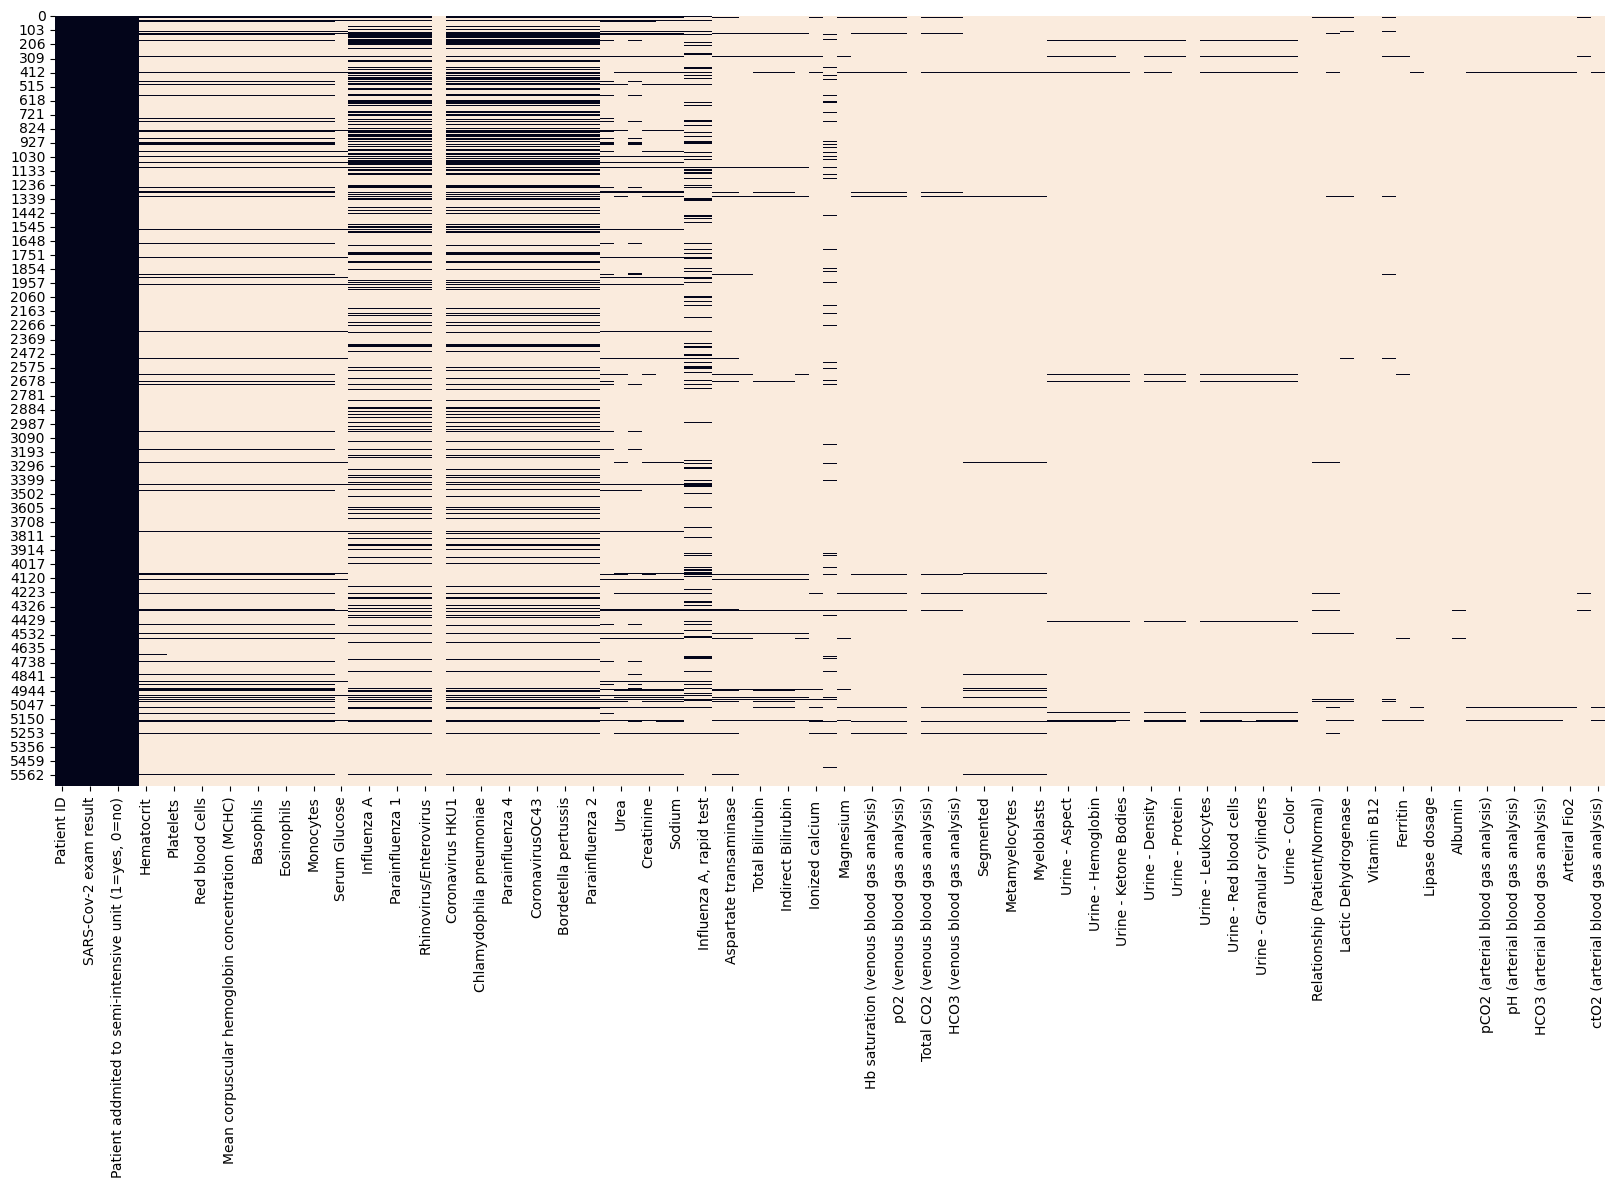

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data_copy.isna(), cbar = False)

Beaucoup de colonnes à droite sont quasiment vides donc il va falloir les supprimmer pendant le pre-processing. Majorité de valeurs manquantes pour certaines valeurs à gauche mais il faut trouver un rapport entre elles si il y en a un.

In [13]:
pd.set_option('display.max_rows', None)  # Affiche toutes les lignes
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
pd.set_option('display.width', None)  # Ne coupe pas les lignes longues
pd.set_option('display.max_colwidth', None)  # Affiche tout le texte

(data_copy.isna().sum() / data_copy.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

On remarque qu'un groupe de variables est à 76% de valeurs manquantes, ce sont les variables de test viral et pour celles à 89%, ce sont des taux sanguins. Je vais supprimmer toutes les variables qui ont plus de 90 % de valeurs manquantes, plus la variable Patient ID qui nous sert à rien.

In [14]:
missing_ratio = data_copy.isna().mean()

kept = missing_ratio[missing_ratio < 0.9].index
dropped = missing_ratio[missing_ratio >= 0.9].index

print("Colonnes gardées :", len(kept))
print("Colonnes supprimées :", len(dropped))
print("Shape avant/après :", data_copy.shape, "→", data_copy[kept].shape)

data_copy = data_copy[kept]
data_copy = data_copy.drop('Patient ID', axis = 1)

Colonnes gardées : 39
Colonnes supprimées : 72
Shape avant/après : (5644, 111) → (5644, 39)


<Axes: >

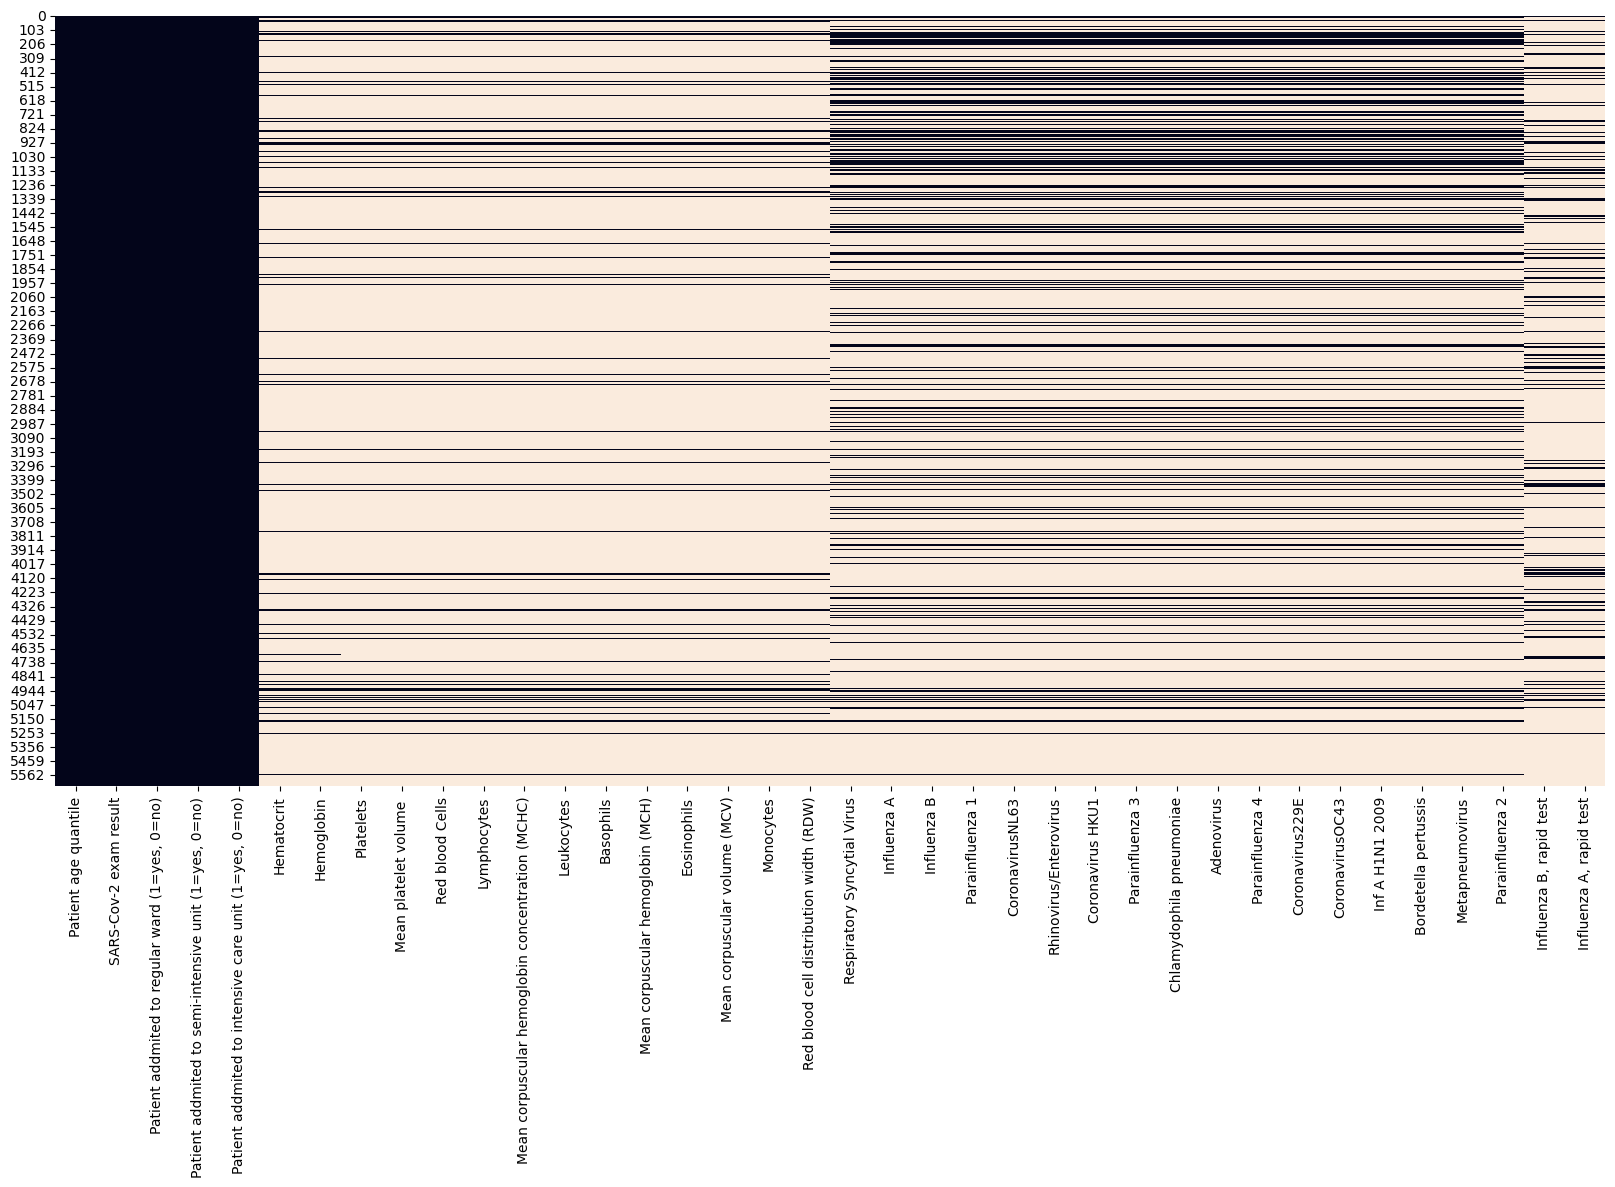

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data_copy.isna(), cbar = False)

### Analyse de fond

On a seulement environ 10% de cas positifs, donc il va falloir prendre cela en compte pour les métriques que l'on va utiliser par la suite.

In [16]:
data_copy['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

Maintenant passons à l'affichage des histogrammes des variables continues

C:\Users\lenny\AppData\Local\Temp\ipykernel_11504\2961923586.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

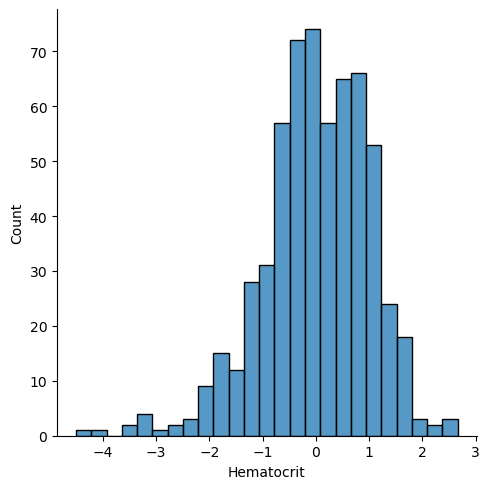

<Figure size 640x480 with 0 Axes>

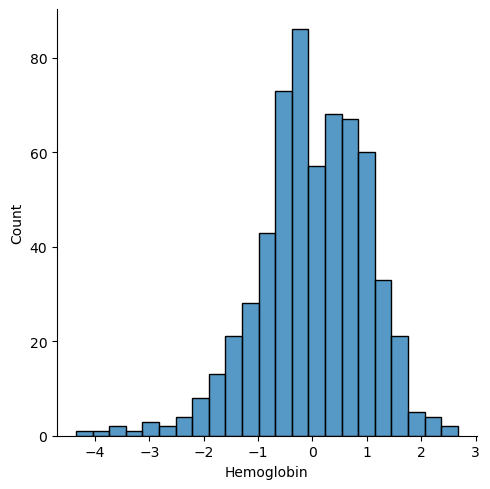

<Figure size 640x480 with 0 Axes>

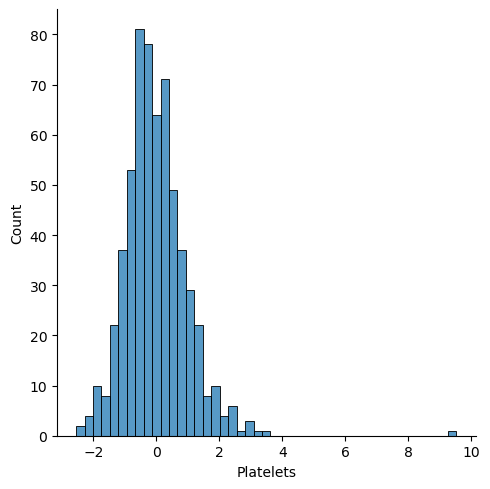

<Figure size 640x480 with 0 Axes>

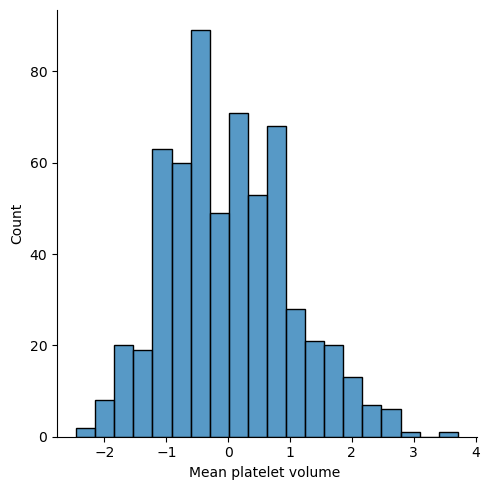

<Figure size 640x480 with 0 Axes>

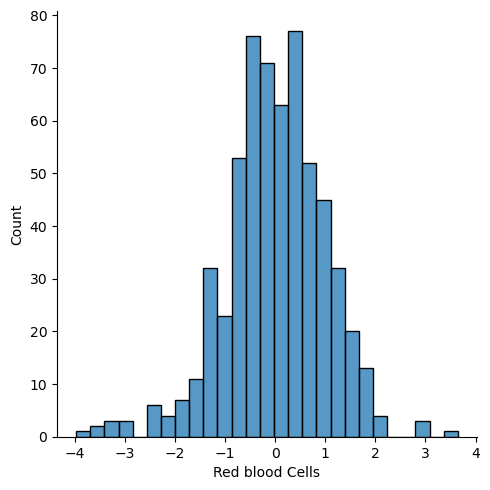

<Figure size 640x480 with 0 Axes>

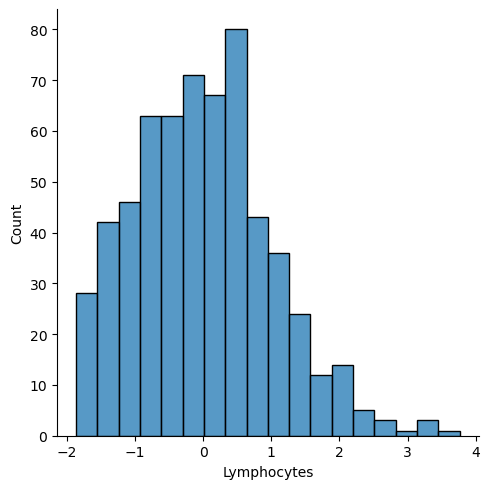

<Figure size 640x480 with 0 Axes>

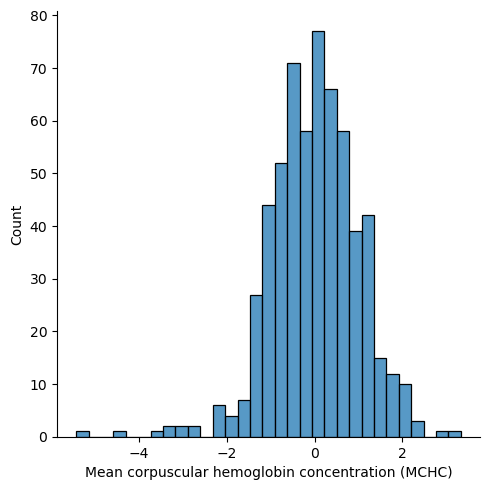

<Figure size 640x480 with 0 Axes>

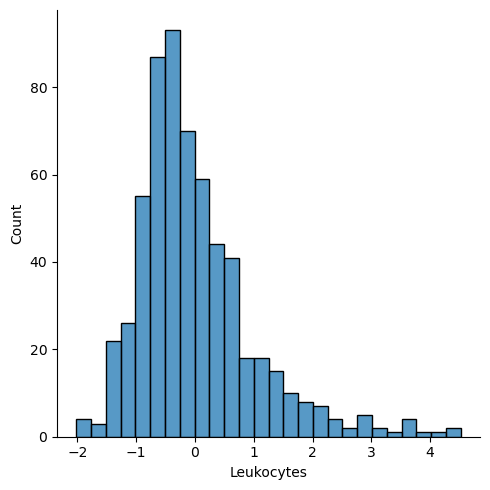

<Figure size 640x480 with 0 Axes>

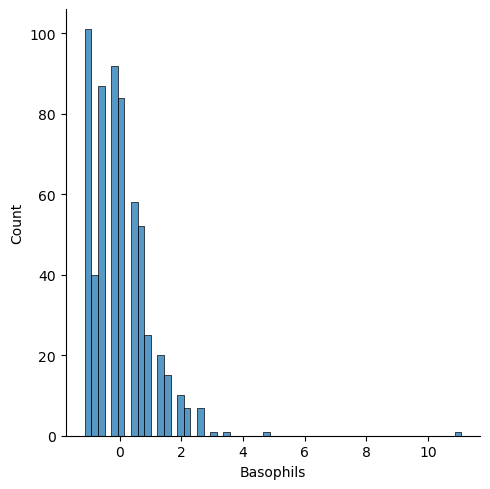

<Figure size 640x480 with 0 Axes>

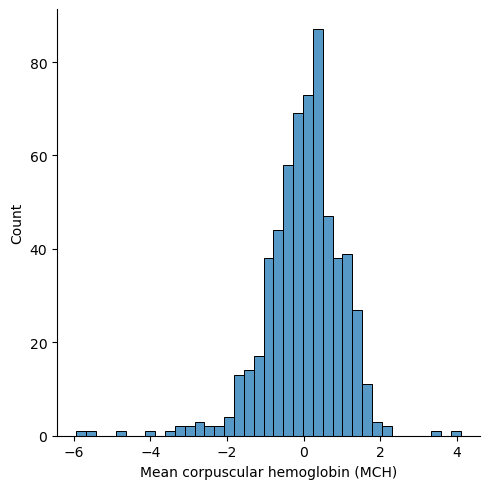

<Figure size 640x480 with 0 Axes>

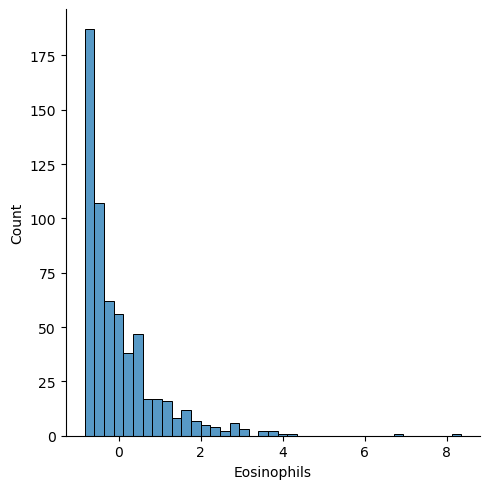

<Figure size 640x480 with 0 Axes>

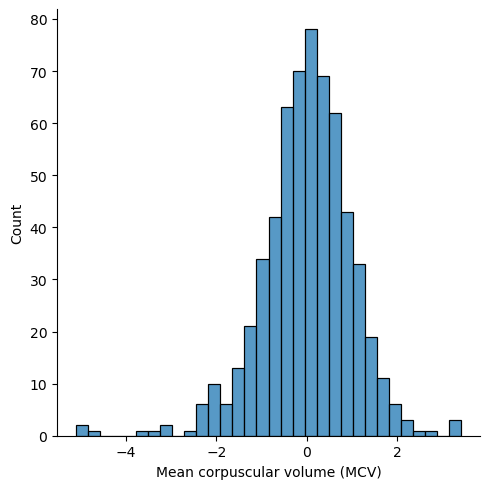

<Figure size 640x480 with 0 Axes>

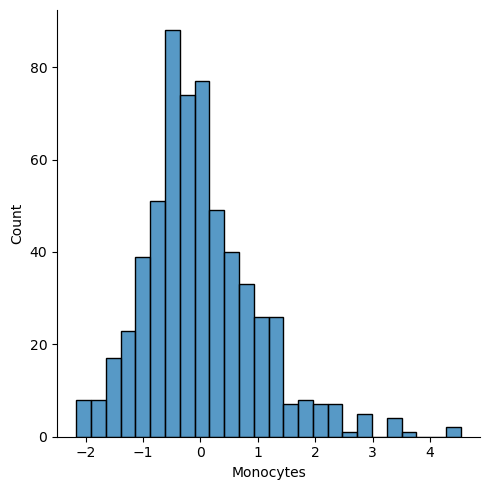

<Figure size 640x480 with 0 Axes>

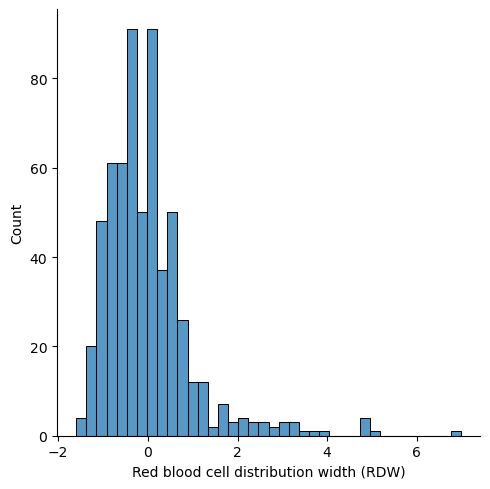

In [17]:
for col in data_copy.select_dtypes('float'):
    plt.figure()
    sns.displot(data_copy[col])

On a aucune information sur ce que représente ces différentes valeurs de âge quantile, ce sont probablement des groupes d'individus ayant le même âge. Maintenant faisons une analyse des variables qualitatives.

In [18]:
for col in data_copy.select_dtypes('object'):
    print(col,data_copy[col].unique())

SARS-Cov-2 exam result ['negative' 'positive']
Respiratory Syncytial Virus [nan 'not_detected' 'detected']
Influenza A [nan 'not_detected' 'detected']
Influenza B [nan 'not_detected' 'detected']
Parainfluenza 1 [nan 'not_detected' 'detected']
CoronavirusNL63 [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus [nan 'detected' 'not_detected']
Coronavirus HKU1 [nan 'not_detected' 'detected']
Parainfluenza 3 [nan 'not_detected' 'detected']
Chlamydophila pneumoniae [nan 'not_detected' 'detected']
Adenovirus [nan 'not_detected' 'detected']
Parainfluenza 4 [nan 'not_detected' 'detected']
Coronavirus229E [nan 'not_detected' 'detected']
CoronavirusOC43 [nan 'not_detected' 'detected']
Inf A H1N1 2009 [nan 'not_detected' 'detected']
Bordetella pertussis [nan 'not_detected' 'detected']
Metapneumovirus [nan 'not_detected' 'detected']
Parainfluenza 2 [nan 'not_detected']
Influenza B, rapid test [nan 'negative' 'positive']
Influenza A, rapid test [nan 'negative' 'positive']


Les variables qualitatives sont toutes binaires et la majorité des valeurs sont 'not_detected' pour chacun d'entre eux (après diffusion graphique que je n'ai pas laissé ici)

### Relations variables / target
On va faire du booléan indexing pour séparer les cas positifs et négatifs dans un premier temps.

In [19]:
positive_data_copy = data_copy[data_copy['SARS-Cov-2 exam result'] == 'positive']
negative_data_copy = data_copy[data_copy['SARS-Cov-2 exam result'] == 'negative']
missing_rate = data_copy.isna().sum()/data_copy.shape[0]
blood_columns = data_copy.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]
viral_columns = data_copy.columns[(missing_rate < 0.8) & (missing_rate > 0.7)]

In [ ]:
#### Relation Target Blood

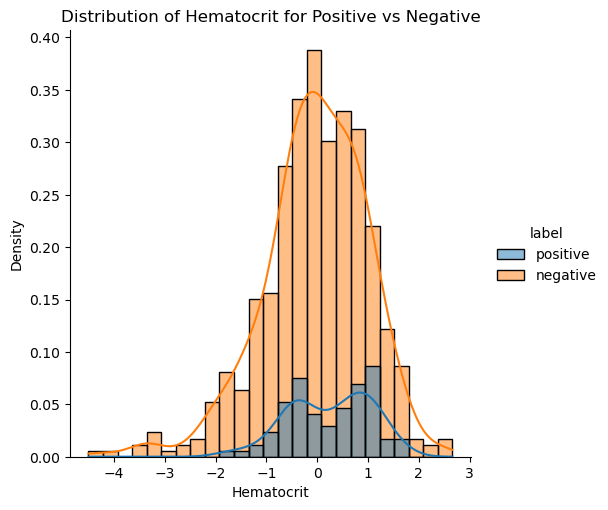

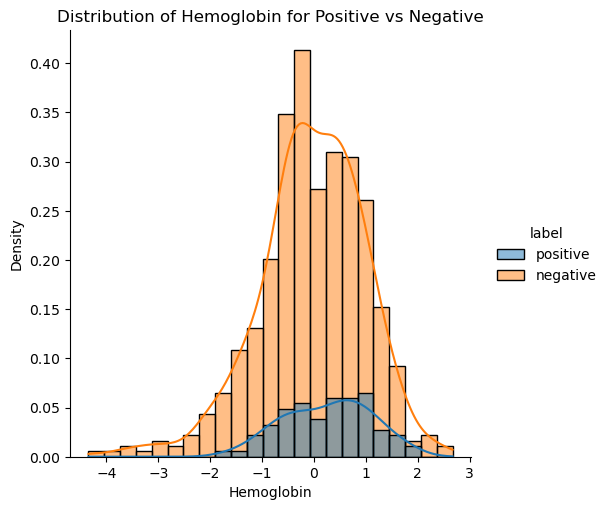

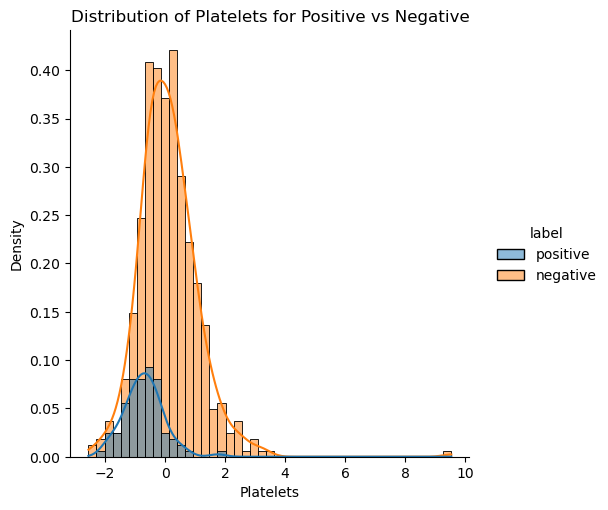

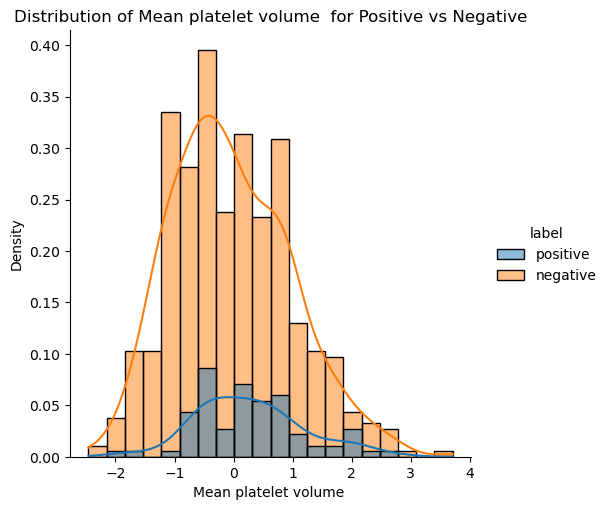

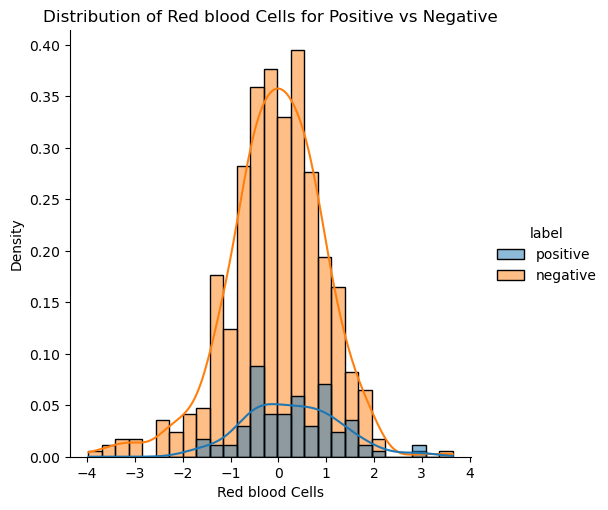

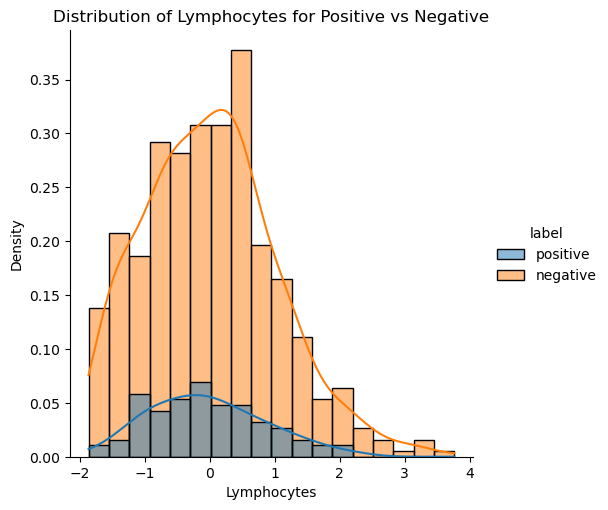

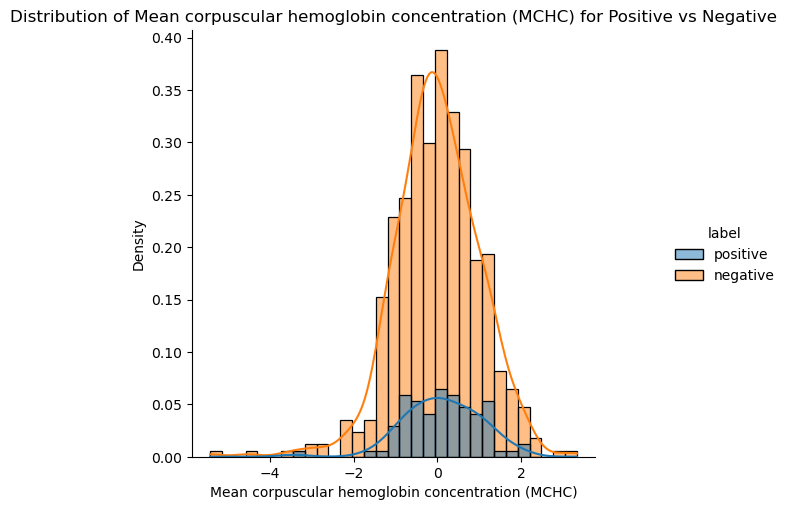

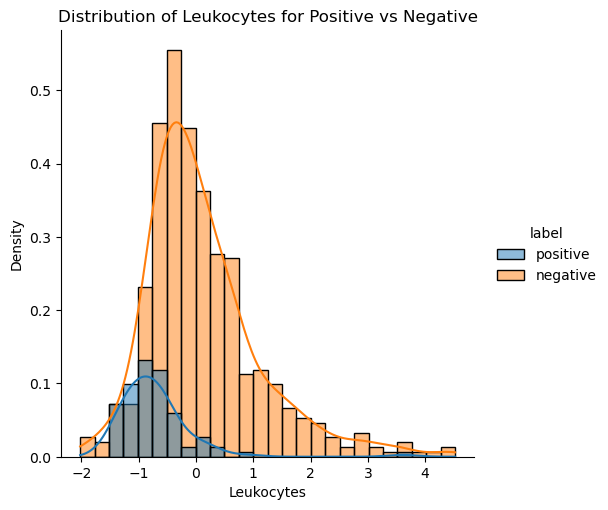

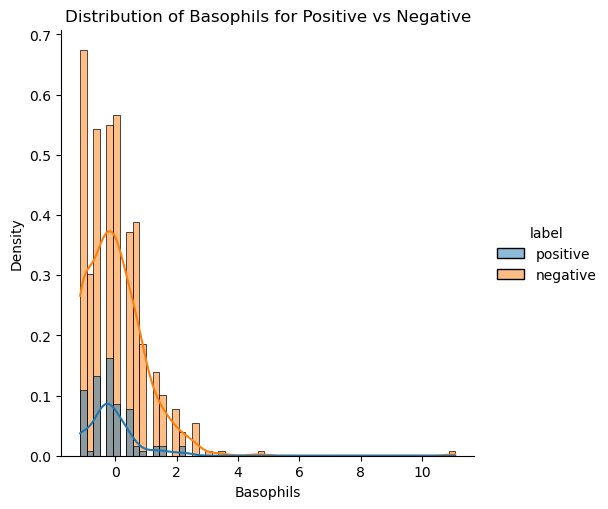

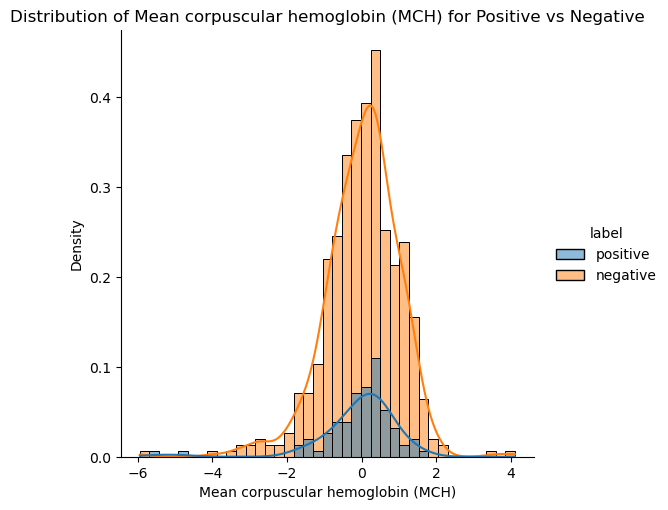

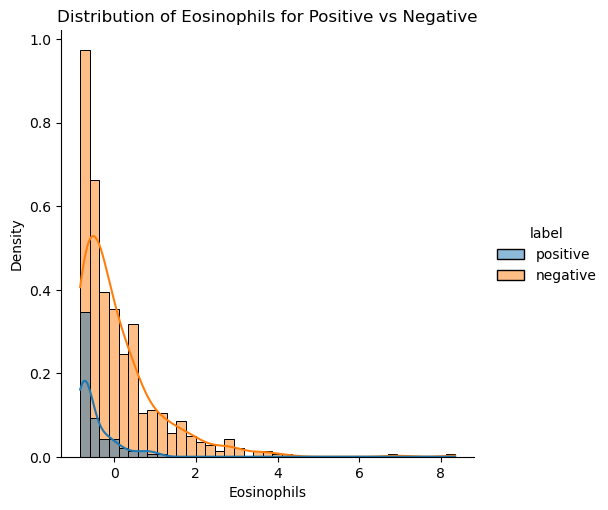

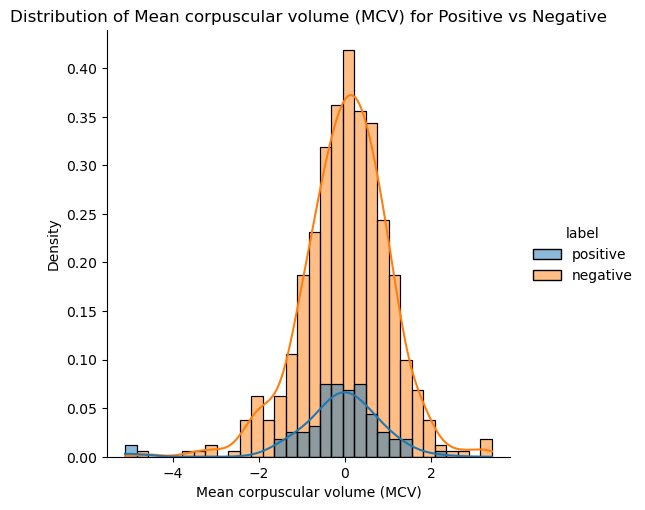

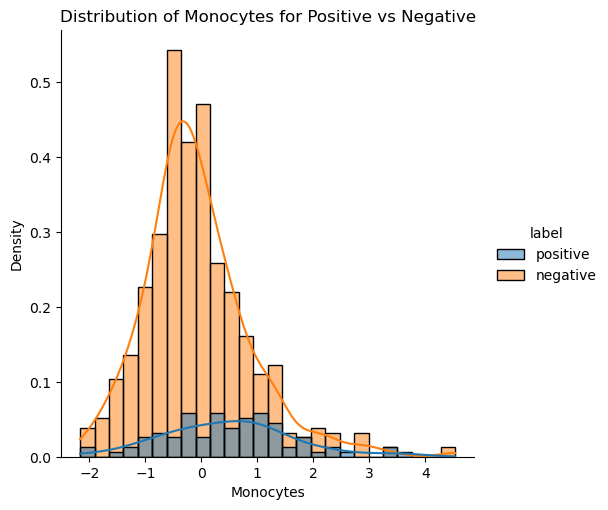

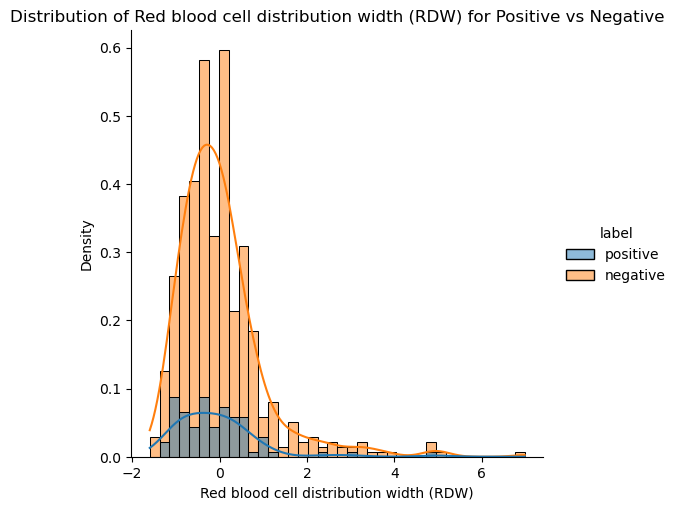

In [20]:
for col in blood_columns:
    df_plot = pd.concat([
        positive_data_copy[[col]].assign(label='positive'),
        negative_data_copy[[col]].assign(label='negative')
    ])

    sns.displot(data=df_plot, x=col, hue='label', kde=True, stat="density", alpha=0.5)
    plt.title(f"Distribution of {col} for Positive vs Negative")
    plt.show()

le taux de platelet des gens positifs à l'air plus faible que ceux non atteints, même chose pour Leukocytes. Sens inverse pour monocytes.

#### Relation Target Age

<Axes: xlabel='Patient age quantile', ylabel='count'>

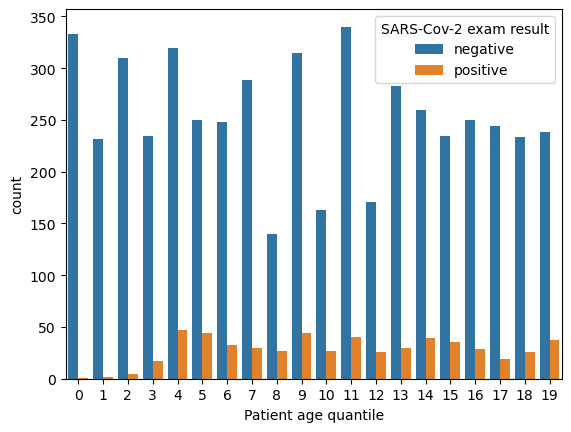

In [21]:
sns.countplot(x= 'Patient age quantile' , hue = 'SARS-Cov-2 exam result',data= data_copy)

Difficile de mener une conclusion sur ce graphique, les personnes des quantiles 1 à 3 sont moins touchées par le Covid mais on ne sait pas vraiment quelle est cette variable.

#### Relation Viral / Target

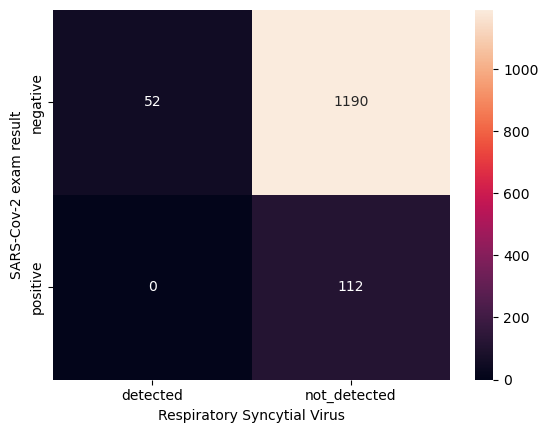

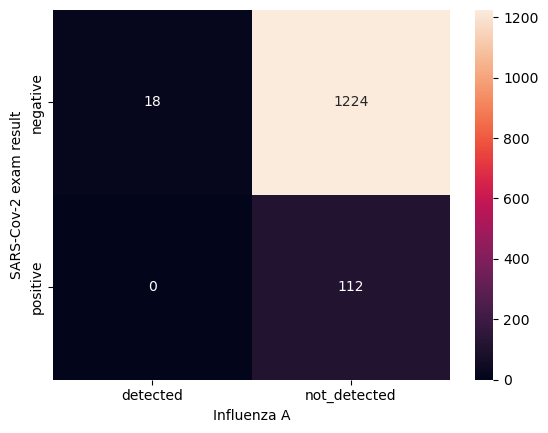

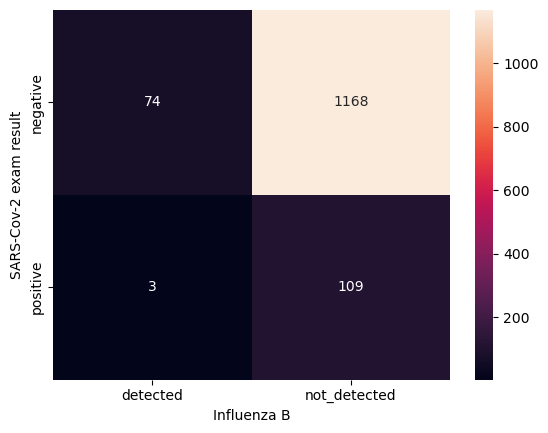

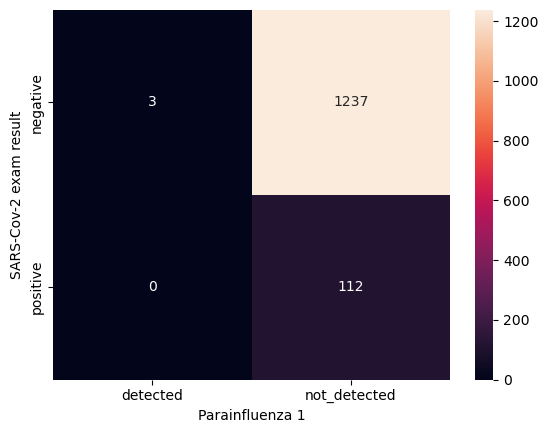

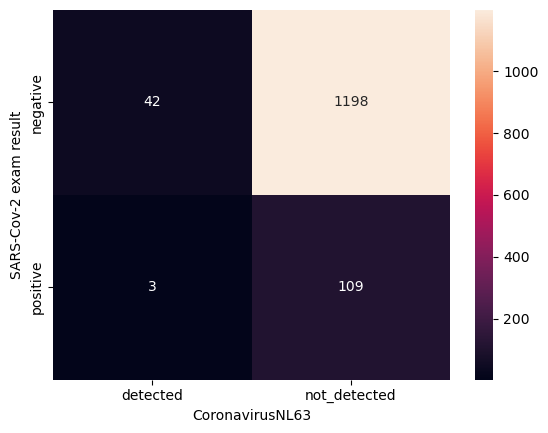

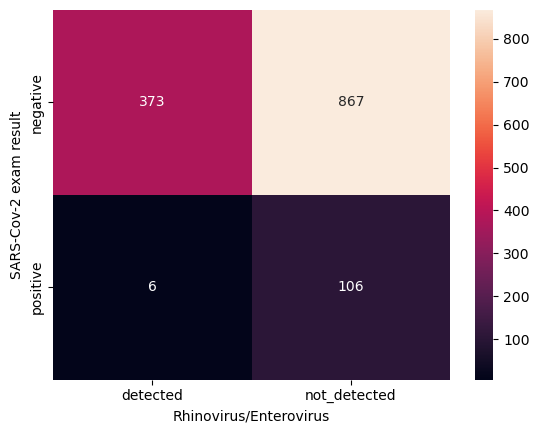

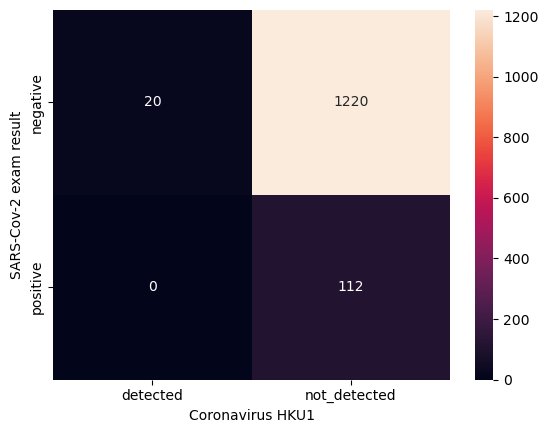

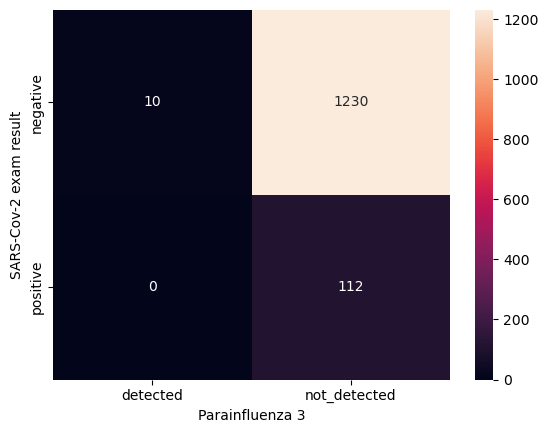

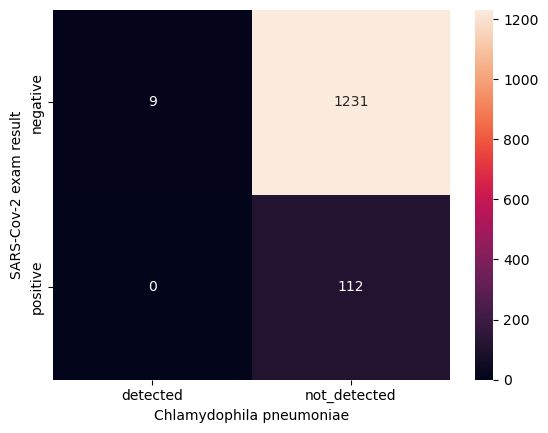

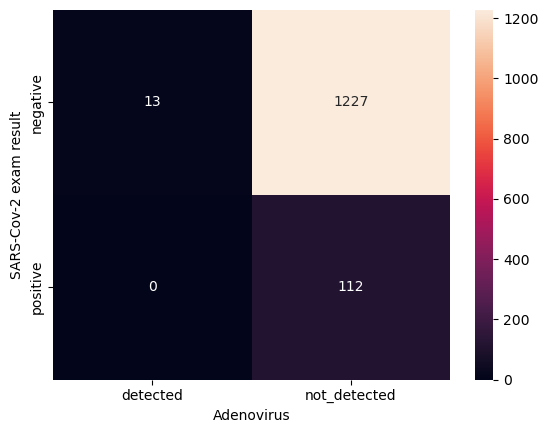

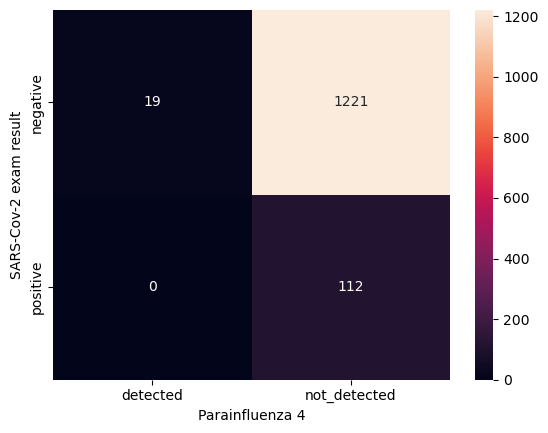

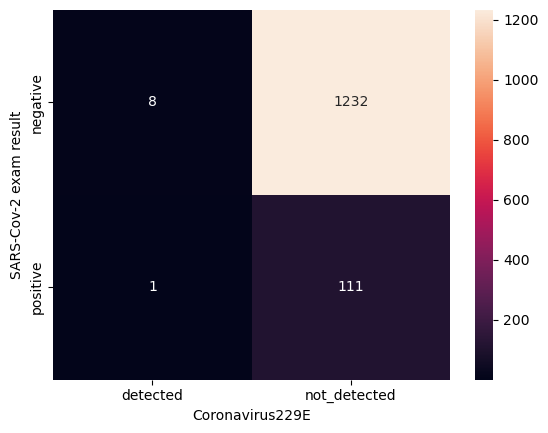

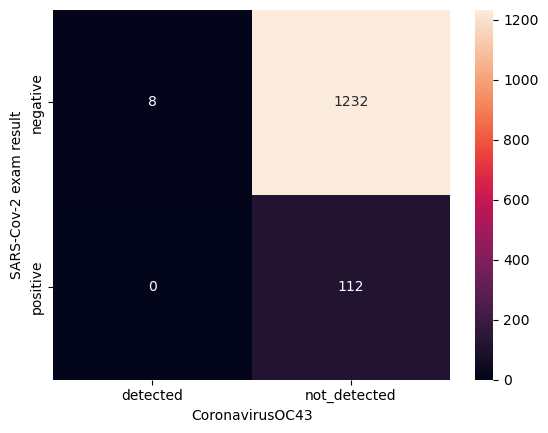

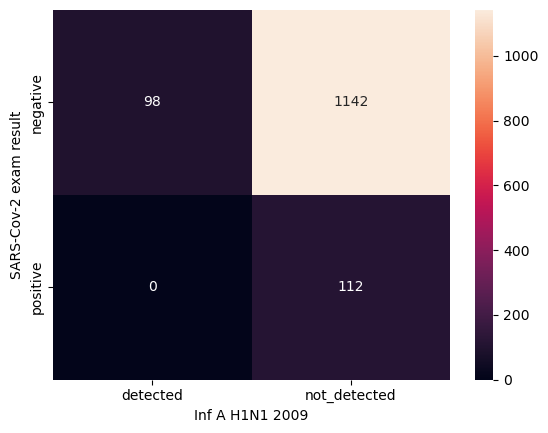

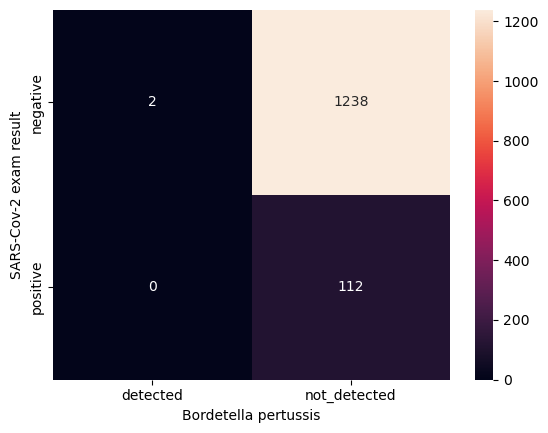

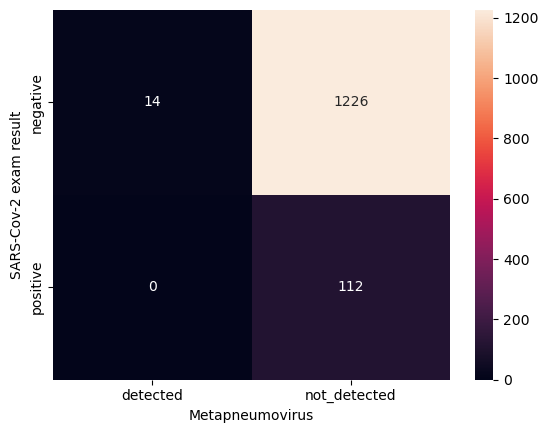

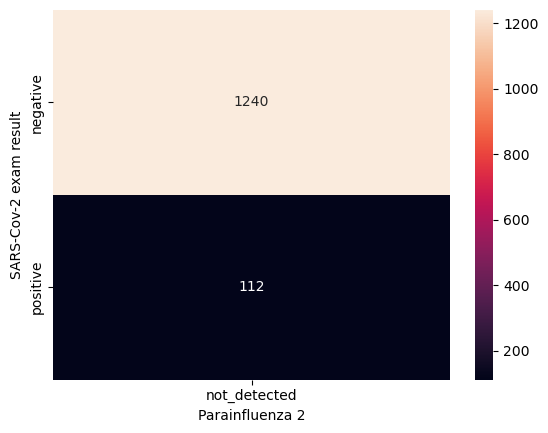

In [22]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(data_copy['SARS-Cov-2 exam result'], data_copy[col]), annot = True, fmt='d')

Remarques : Rien à signaler, les maladies virales n'ont pas l'air d'avoir un lien évident avec la présence ou non d'un coronavirus à priori.

Maintenant on pourrait créer une nouvelle variable dans notre dataset pour distinguer quand le patient est malade ou pas, c'est à dire si il a été détecté à un test viral ou sanguin.

In [23]:
data_copy['est malade'] = np.sum(data_copy[viral_columns[:-2]] == 'detected' , axis = 1) >= 1
data_copy.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",est malade
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,True
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,True


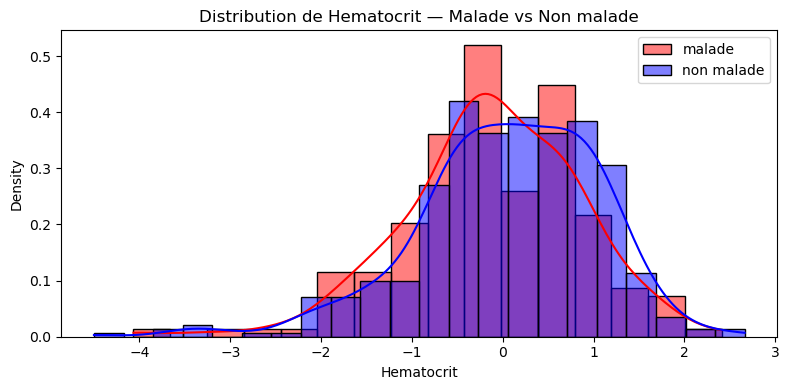

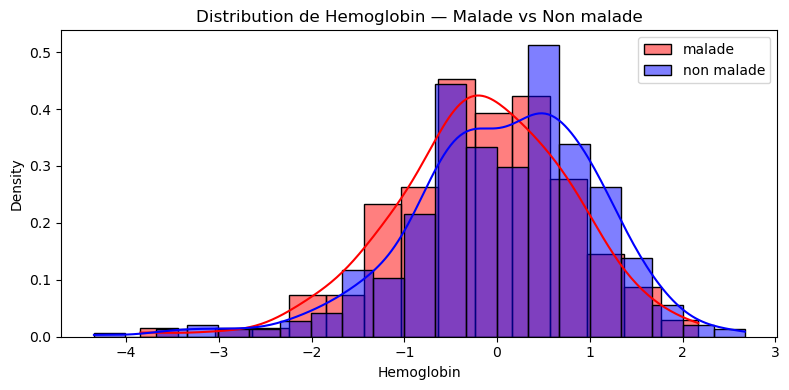

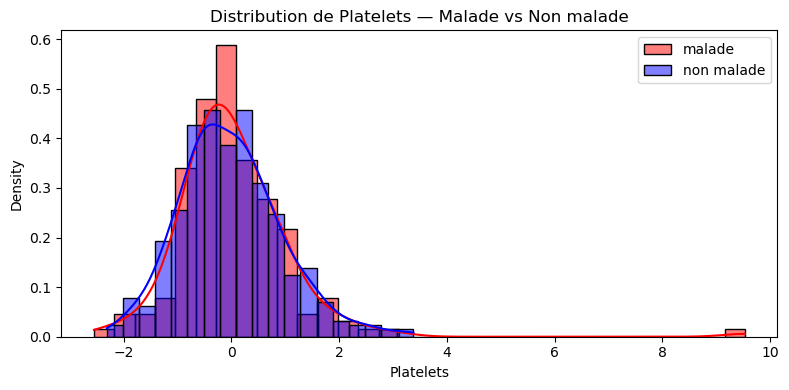

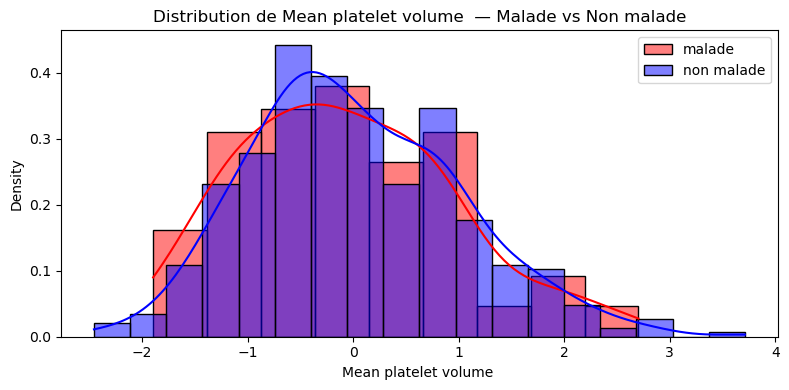

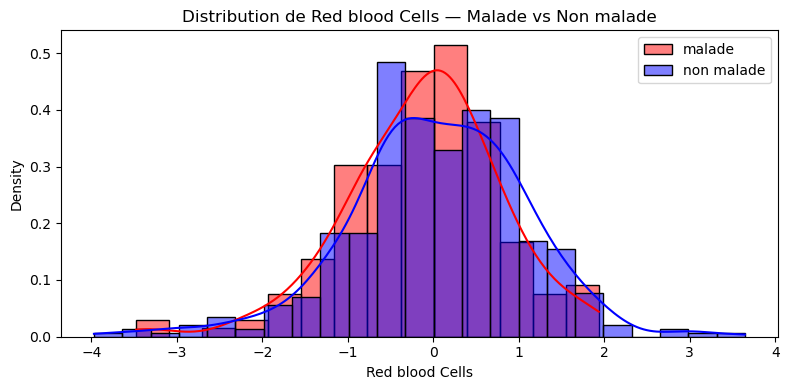

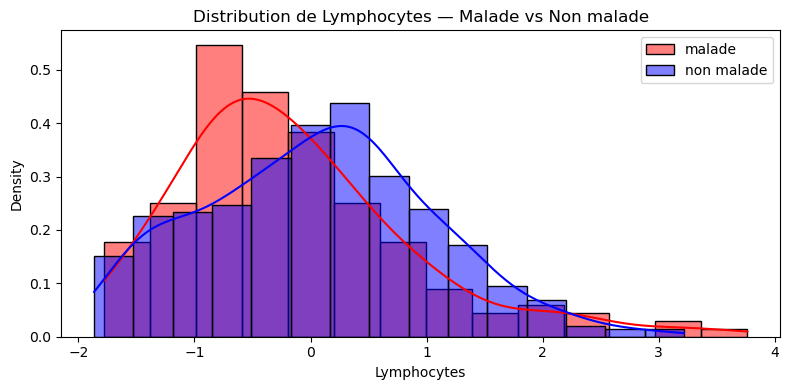

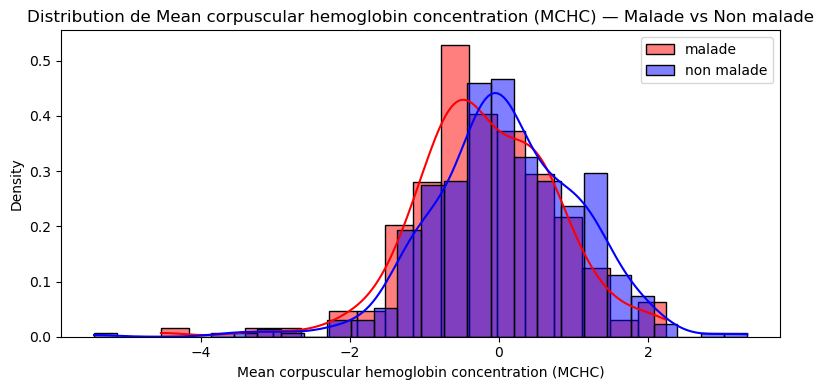

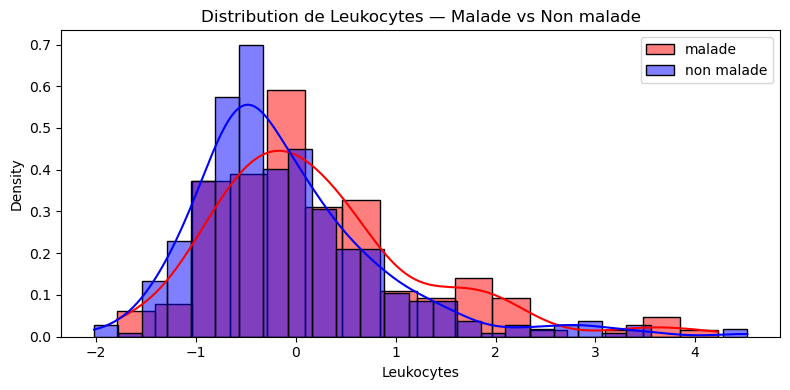

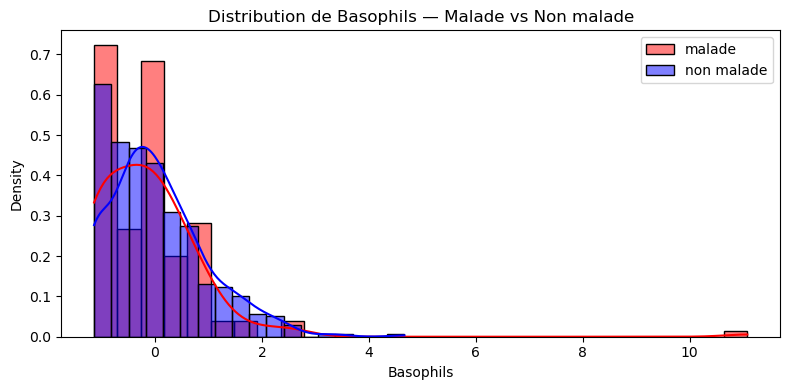

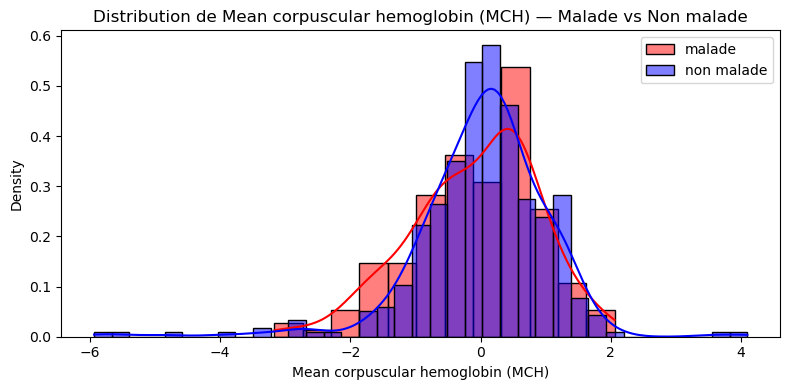

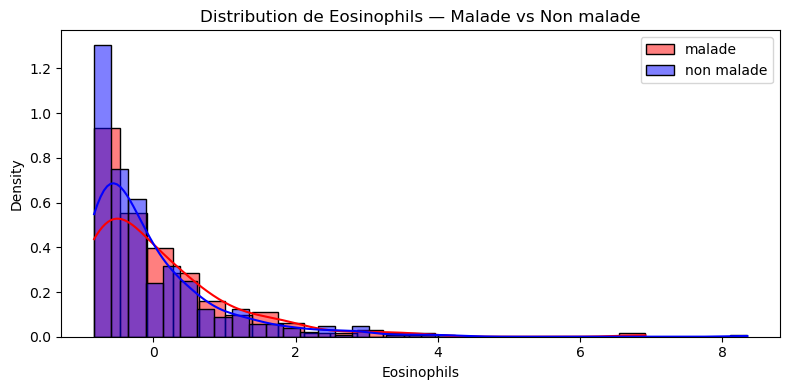

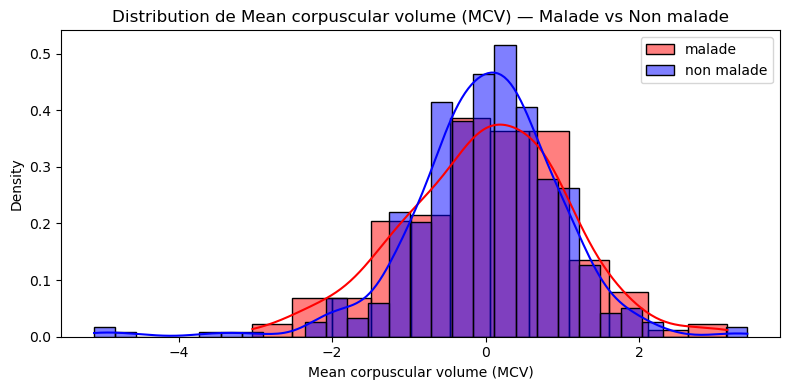

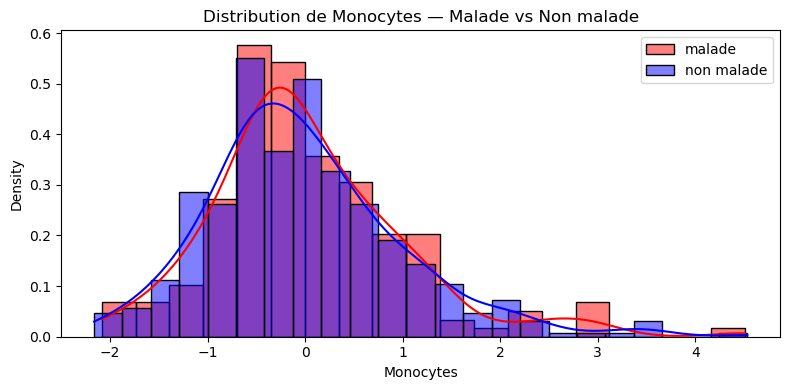

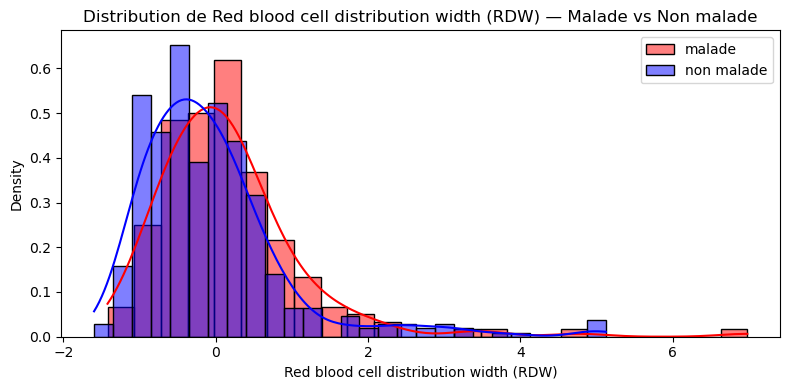

In [24]:
malade_data_copy = data_copy[data_copy['est malade'] == True]
non_malade_data_copy = data_copy[data_copy['est malade'] == False]
for col in blood_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(malade_data_copy[col], label='malade', color='red', kde=True, stat='density', alpha=0.5)
    sns.histplot(non_malade_data_copy[col], label='non malade', color='blue', kde=True, stat='density', alpha=0.5)
    plt.title(f"Distribution de {col} — Malade vs Non malade")
    plt.legend()
    plt.tight_layout()
    plt.show()

Pas de différences majeures, hormis pour les Leukocytes il y a un décalage, les patients non malades ont un taux plus faible. Maintenant on peut relier le fait d'avoir une hospitalisation avec le fait d'avoir le covid.

In [25]:
def hospitalisation(data_copy):
    if data_copy['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    if data_copy['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi intensifs'
    if data_copy['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'pas hospitalise'
data_copy['statut'] = data_copy.apply(hospitalisation, axis = 1)
data_copy.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",est malade,statut
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,pas hospitalise
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,True,pas hospitalise
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,pas hospitalise
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,pas hospitalise
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,True,pas hospitalise


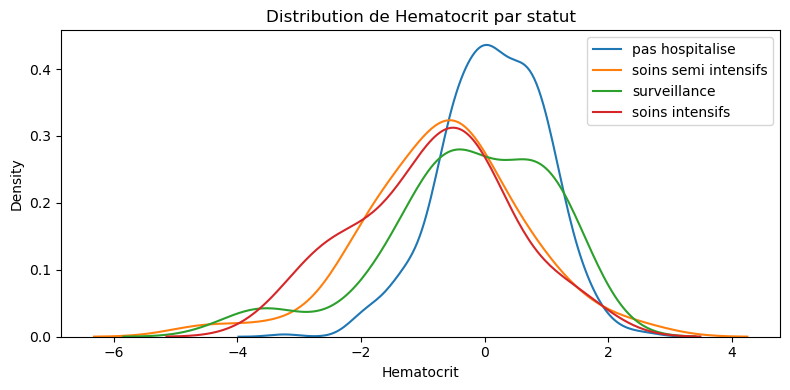

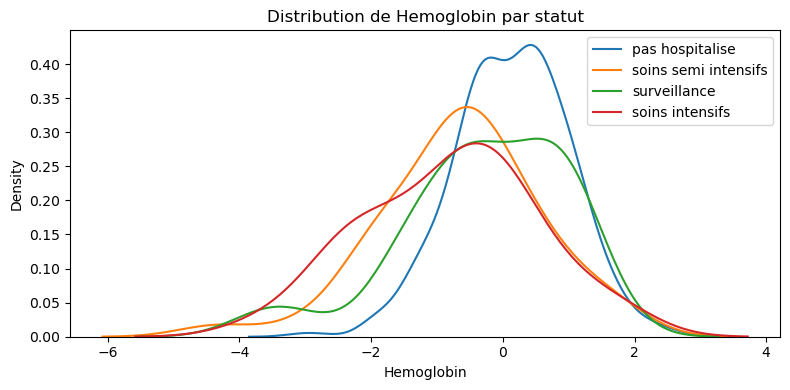

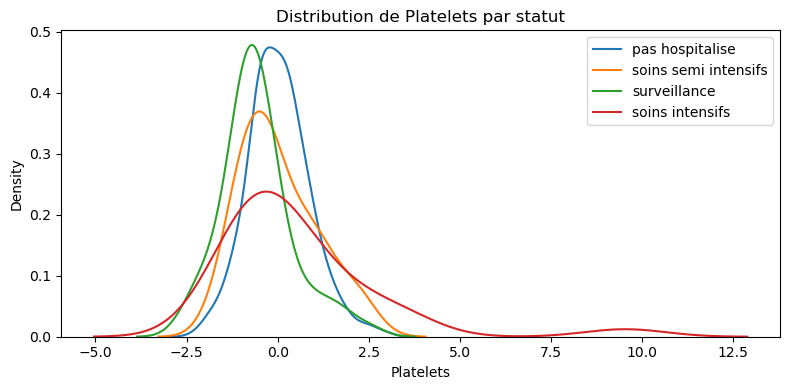

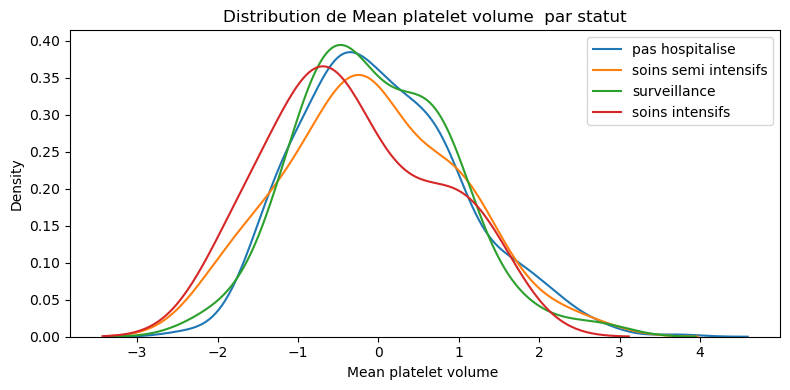

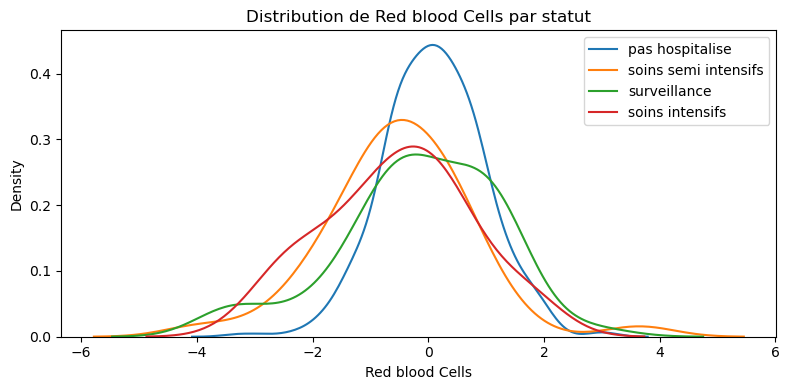

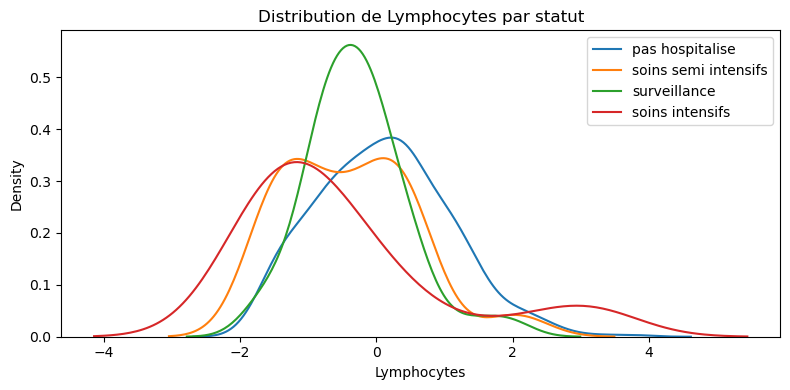

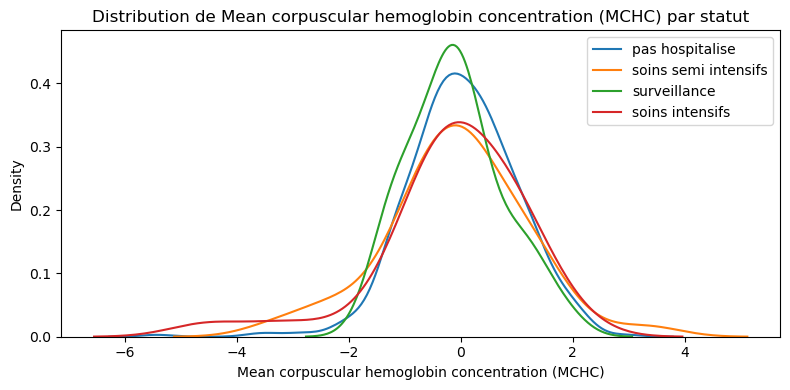

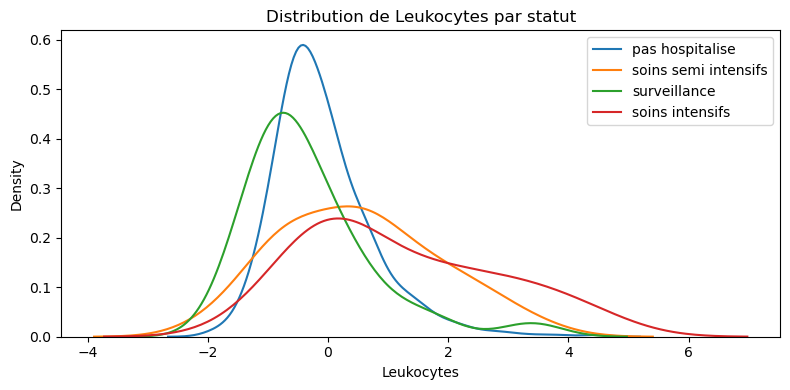

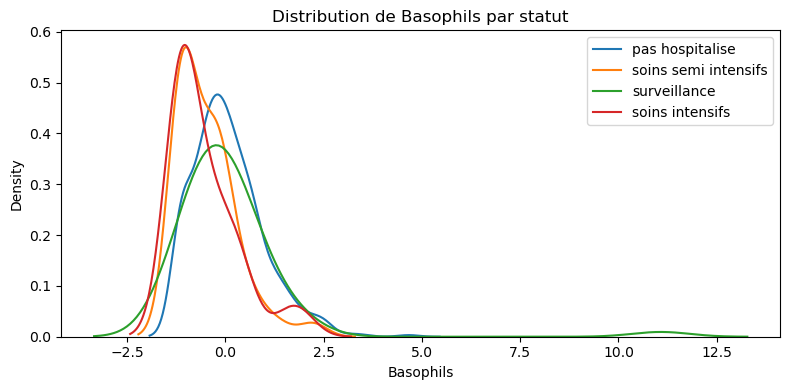

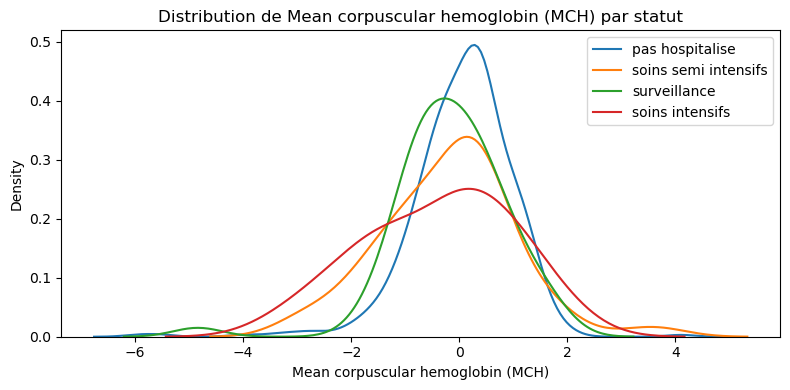

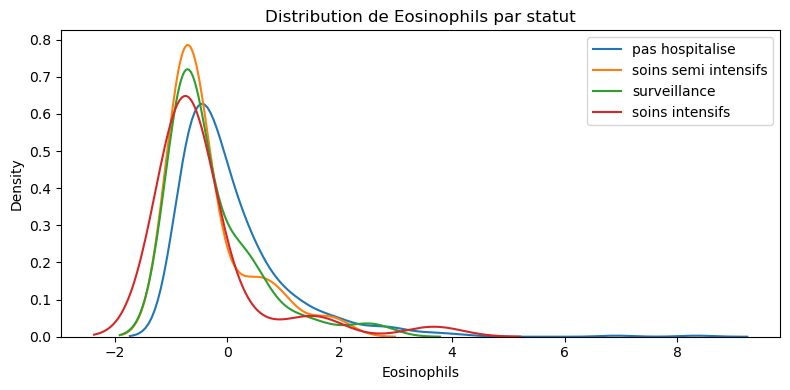

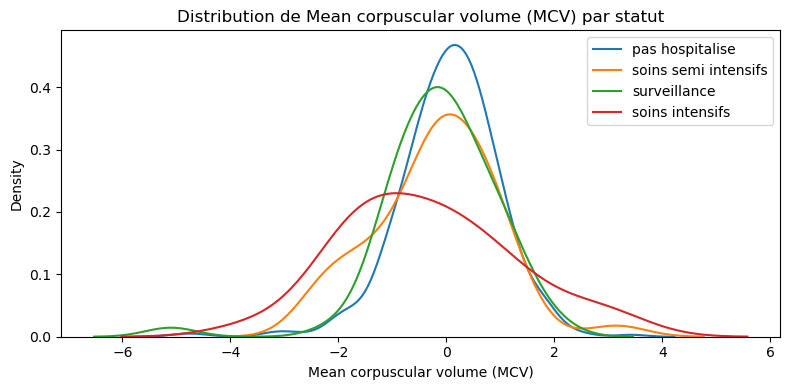

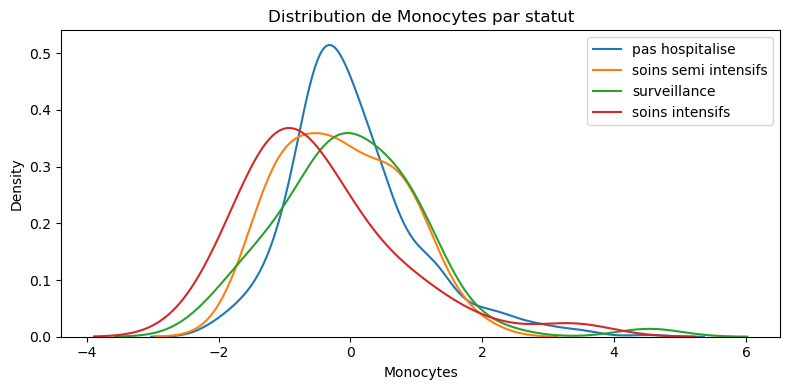

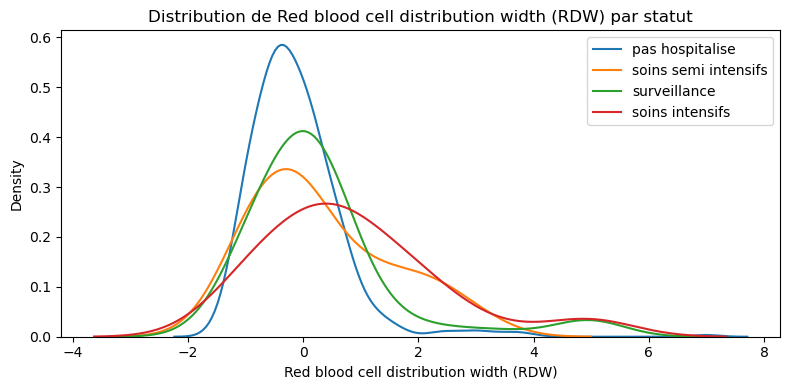

In [26]:
for col in blood_columns:
    plt.figure(figsize=(8,4))

    for cat in data_copy['statut'].unique():
        subset = data_copy[data_copy['statut'] == cat]
        sns.kdeplot(subset[col], label=cat, fill=False)

    plt.title(f"Distribution de {col} par statut")
    plt.legend()
    plt.tight_layout()
    plt.show()

Les taux d'hematocrites et d'hemoglobines sont plus élevés pour les personnes pas hospitalisées et le taux de leukocytes est plus variables pour les personnes en soins intensifs et semi intensifs.

#### tests d'hypothèses nulles
il faut faire des T-tests pour commencer. Il faut faire de l'échantillonage pour les cas négatifs car ils sont trop nombreux par rapport aux positifs pour notre analyse. On fait ceci avec "negative_data_copy.sample(positive_data_copy.shape[0])"

In [27]:
from scipy.stats import ttest_ind
def t_test(col):
    alpha = 0.02
    stat,p = ttest_ind(negative_data_copy.sample(positive_data_copy.shape[0])[col].dropna(),positive_data_copy[col].dropna())
    if p < alpha: 
        return 'H0 rejetée'
    else:
        return 'H0 acceptée'
for col in blood_columns:
    print(f'{col :-<50}{t_test(col)}')

Hematocrit----------------------------------------H0 acceptée
Hemoglobin----------------------------------------H0 acceptée
Platelets-----------------------------------------H0 rejetée
Mean platelet volume -----------------------------H0 acceptée
Red blood Cells-----------------------------------H0 rejetée
Lymphocytes---------------------------------------H0 acceptée
Mean corpuscular hemoglobin concentration (MCHC)--H0 acceptée
Leukocytes----------------------------------------H0 rejetée
Basophils-----------------------------------------H0 acceptée
Mean corpuscular hemoglobin (MCH)-----------------H0 acceptée
Eosinophils---------------------------------------H0 rejetée
Mean corpuscular volume (MCV)---------------------H0 acceptée
Monocytes-----------------------------------------H0 rejetée
Red blood cell distribution width (RDW)-----------H0 acceptée


Les taux de Platelets, Leukocytes , Eosinophils et Monocytes sont statistiquement ifférents en fonction de si le patient est atteints du covid ou non.

### Pré-Processing

#### Découpage trainset testset

In [61]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

cols = list(key_columns) + list(blood_columns) + list(viral_columns)
new_data_copy = data_copy[cols]
new_data_copy.head()


,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [62]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(new_data_copy, test_size = 0.2, random_state=0)

#### Encodage et imputation

On va donner un code binaire à toutes nos variables qualitatives.

In [70]:
def encodage(new_data_copy):
    code = {'positive': 1,
        'negative':0,
        'detected':1,
        'not_detected': 0}

    for col in new_data_copy.select_dtypes('object'):
        new_data_copy[col] = new_data_copy[col].map(code)

    return new_data_copy

In [71]:
def feature_engineering(new_data_copy):
    new_data_copy['est malade'] = new_data_copy[viral_columns].sum(axis =1) >= 1 
    new_data_copy = new_data_copy.drop(viral_columns, axis = 1)  
    return new_data_copy


In [72]:
def imputation(new_data_copy):
    return new_data_copy.dropna(axis = 0)

In [73]:
def preprocessing(new_data_copy):
    new_data_copy = encodage(new_data_copy)
    new_data_copy = feature_engineering(new_data_copy)
    new_data_copy = imputation(new_data_copy)
    X = new_data_copy.drop('SARS-Cov-2 exam result', axis = 1)
    Y = new_data_copy['SARS-Cov-2 exam result']

    print(Y.value_counts())

    return X,Y

In [74]:
X_train, Y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [75]:
X_test, Y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


Toutes les étapes de base du pré-processing sont réalisées, on peut faire notre premier modèle de machine learning.

## Modélisation

Ici on choisit notre modèle et on l'évalue. De nombreuses modifications sont nécessaires pour arriver au résultat final.

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [103]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias= False), SelectKBest(f_classif, k= 10))

In [104]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state = 0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(),KNeighborsClassifier())

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111



c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\len

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71       111
weighted avg       0.87      0.88      0.87       111

KNN
[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



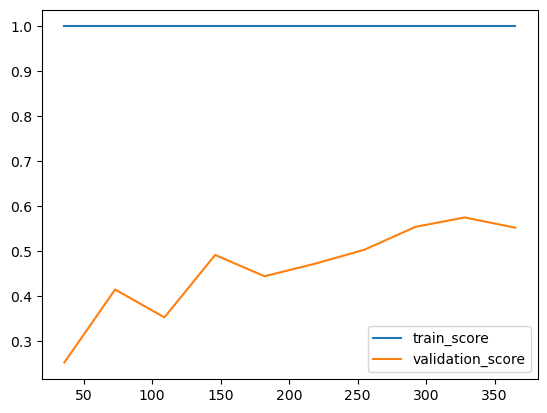

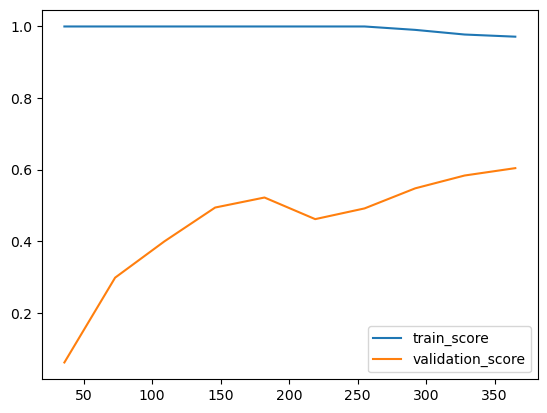

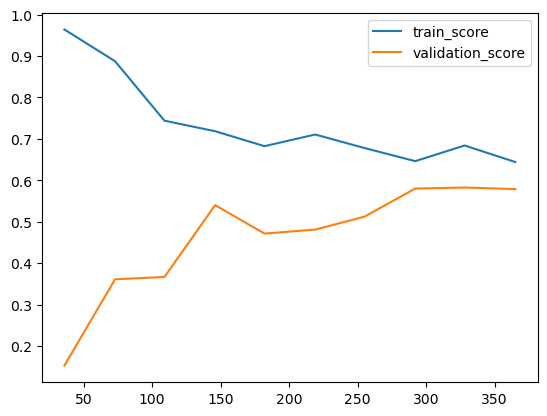

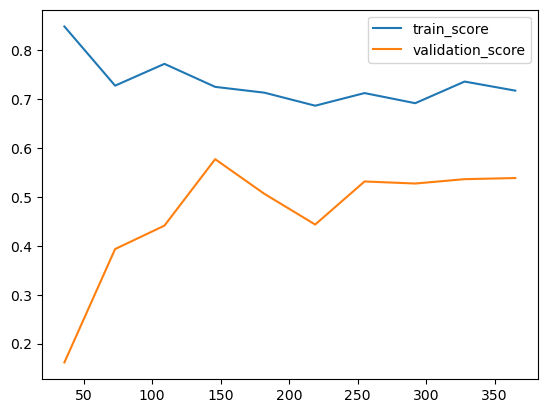

In [110]:
list_of_models = {'RandomForest': RandomForest,
                  'AdaBoost': AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN}

for name, model in list_of_models.items():
    print(name)
    evaluation(model)

### Procédure d'évaluation de nos modèles

c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\lenny\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\

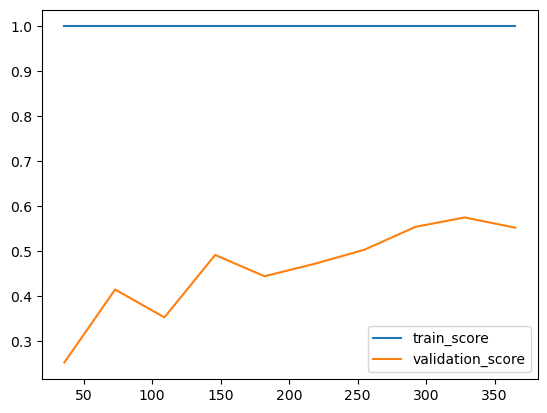

In [105]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluation(model):
    model.fit(X_train, Y_train)
    Ypred = model.predict(X_test)
    print(confusion_matrix(Y_test, Ypred))
    print(classification_report(Y_test, Ypred))

    N, train_score ,val_score = learning_curve(model, X_train, Y_train, cv = 4, train_sizes= np.linspace(0.1,1,10), scoring = 'f1')

    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label = 'train_score')
    plt.plot(N, val_score.mean(axis=1), label = 'validation_score')
    plt.legend()

evaluation(model)
    

### Optimisation

In [123]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [127]:
hyper_parameters = {'svc__gamma': [1e-3, 1e-4], 
                    'svc__C': [1,10,50,100,1000],
                    'pipeline__polynomialfeatures__degree': [2,3,4],
                    'pipeline__selectkbest__k': range(40,60)}

In [132]:
grid = RandomizedSearchCV(SVM, hyper_parameters, scoring= 'recall', cv=4, n_iter=50)
grid.fit(X_train, Y_train)
print(grid.best_params_)
Ypred = model.predict(X_test)
print(confusion_matrix(Y_test, Ypred))

Y_pred= grid.predict(X_test)

print(classification_report(Y_test,Y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 55, 'pipeline__polynomialfeatures__degree': 3}
[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



### Precision Recall Curve

In [150]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

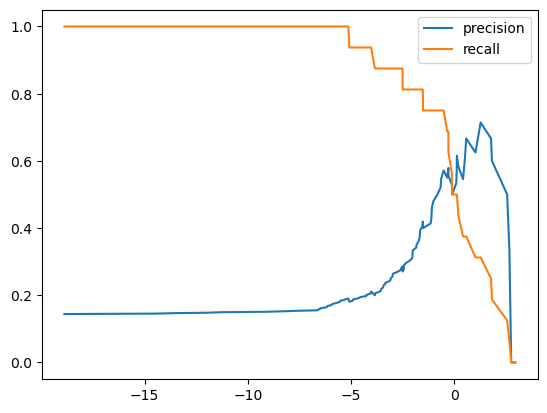

In [135]:
precision, recall, threshold= precision_recall_curve(Y_test,grid.best_estimator_.decision_function(X_test))

plt.plot(threshold, precision[:-1], label = 'precision')
plt.plot(threshold, recall[:-1], label = 'recall')
plt.legend()

In [155]:
def model_final(model,X, threshold= -1):
    return model.decision_function(X) > threshold

In [153]:
Y_pred = model_final(grid.best_estimator_, X_test, -1)


f1_score(Y_test,Y_pred)

0.6

In [152]:
recall_score(Y_test,Y_pred)

0.75